## 라이브러리 호출

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [2]:
# json 불러오기
file_path = "../chunker/casper_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

casper = pd.DataFrame(data)

# 결과 확인
print(casper.head())


                                                text      type source_pages  \
0  AX_ko_KR.book  Page 1\n안전 및 차량 손상 경고 본 취급설명서에는...                    [1]   
1                                          선택 또는 미장착  subtitle          [1]   
2  사양표시\n본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하고 있\n...  subtitle       [1, 2]   
3                                        내용 찾기 방법 설명     title          [2]   
4                              내용으로 찾을 때\n목차를 활용하세요.  subtitle          [2]   

  model  
0   캐스퍼  
1   캐스퍼  
2   캐스퍼  
3   캐스퍼  
4   캐스퍼  


In [3]:
# 전체 행/열 수와 결측치 등 기본 정보
casper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          274 non-null    object
 1   type          274 non-null    object
 2   source_pages  274 non-null    object
 3   model         274 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


In [4]:
print(casper['type'].value_counts())
print("-"*50)
print(casper['source_pages'].value_counts())
print("-"*50)
print(casper['model'].value_counts())
print("-"*50)


type
title       198
subtitle     75
              1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]                10
[3]                 5
[338]               5
[2]                 3
[1]                 2
                   ..
[334, 335]          1
[339, 340, 341]     1
[338, 339]          1
[341, 342]          1
[342, 343]          1
Name: count, Length: 245, dtype: int64
--------------------------------------------------
model
캐스퍼    274
Name: count, dtype: int64
--------------------------------------------------


In [3]:
# 'type' 열에서 NaN 값을 가진 행만 출력
print(casper[casper['type'].isna()])


Empty DataFrame
Columns: [text, type, source_pages, model]
Index: []


# 빈 인덱스 하나 있음.

## 빈도기반 분석

In [5]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
casper_texts = casper['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
casper_tokenized = [okt.nouns(text) for text in casper_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
casper_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in casper_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
casper_flat_tokens = list(itertools.chain.from_iterable(casper_filtered_tokens))  # 리스트 평탄화
casper_word_freq = Counter(casper_flat_tokens)


# 6. 상위 50개 단어 출력
casper_top_n = 50
casper_top_words = casper_word_freq.most_common(casper_top_n)

# 출력
for word, freq in casper_top_words:
    print(f'{word}: {freq}')



차량: 1449
작동: 842
주행: 831
보조: 674
상태: 600
시동: 551
사용: 538
기능: 537
브레이크: 420
타이어: 411
설정: 403
발생: 402
점검: 392
표시: 383
주의: 362
방지: 360
속도: 359
전방: 330
충돌: 327
확인: 312
장치: 309
도어: 309
주차: 301
엔진: 297
운전자: 285
안전: 282
경고: 281
버튼: 275
고등: 275
좌석: 274
에어백: 255
휠: 253
키: 250
운전: 249
자동: 243
스마트: 240
위치: 239
해제: 237
클러스터: 231
손상: 227
이상: 225
사항: 224
조절: 223
제한: 222
시스템: 221
정상: 221
페달: 220
유지: 220
센서: 220
도로: 211


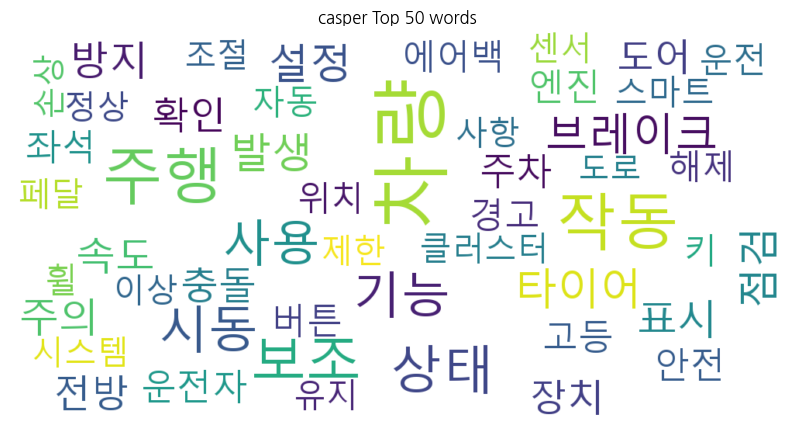

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
casper_top_words_dict = dict(casper_top_words)

# 2. 워드 클라우드 시각화
casper_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(casper_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(casper_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("casper Top 50 words")
plt.show()

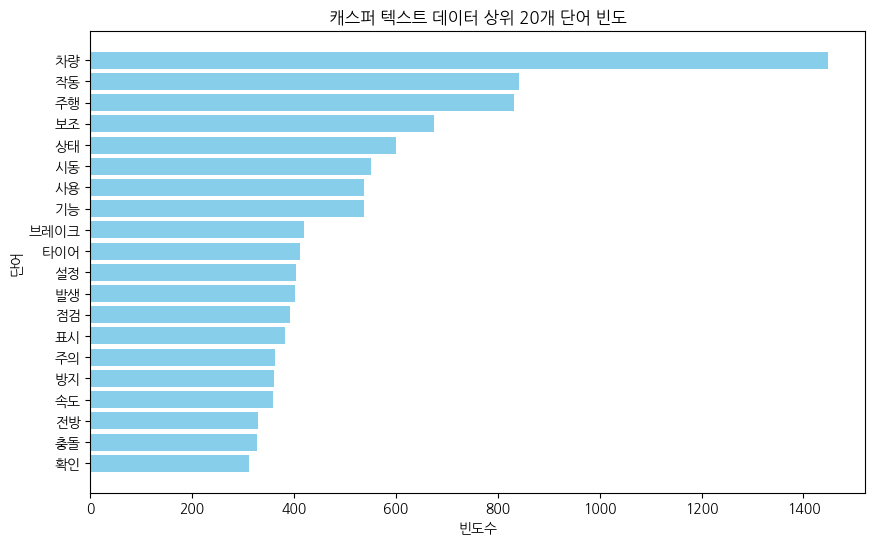

In [7]:
casper_top_words2 = casper_word_freq.most_common(20)
casper_top_words_dict2 = dict(casper_top_words2)
casper_words, casper_counts = zip(*casper_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(casper_words, casper_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('캐스퍼 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석

차량: 18.9134
보조: 14.7187
주행: 12.4535
작동: 11.3434
시동: 10.4560
사용: 10.1273
상태: 9.6803
설정: 9.3251
충돌: 8.9041
타이어: 8.8722
기능: 8.7722
전방: 8.7586
엔진: 8.7477
브레이크: 8.6315
점검: 8.3259
표시: 7.7902
좌석: 7.6919
에어백: 7.4251
속도: 7.3249
경고: 7.2353
도어: 7.2068
방지: 7.1222
버튼: 6.6984
조절: 6.6143
주의: 6.3978
스마트: 6.1941
운전자: 6.0818
발생: 6.0761
장치: 6.0224
주차: 6.0141
고등: 5.9082
클러스터: 5.7691
제한: 5.6496
안전: 5.5901
사항: 5.4992
자동: 5.4739
안전벨트: 5.3265
확인: 5.2840
스위치: 5.2562
센서: 5.2500
해제: 5.1425
페달: 5.0637
위치: 5.0528
배터리: 4.9224
스티: 4.8993
후방: 4.8401
인식: 4.8207
차로: 4.7710
시스템: 4.7574
퓨즈: 4.7191


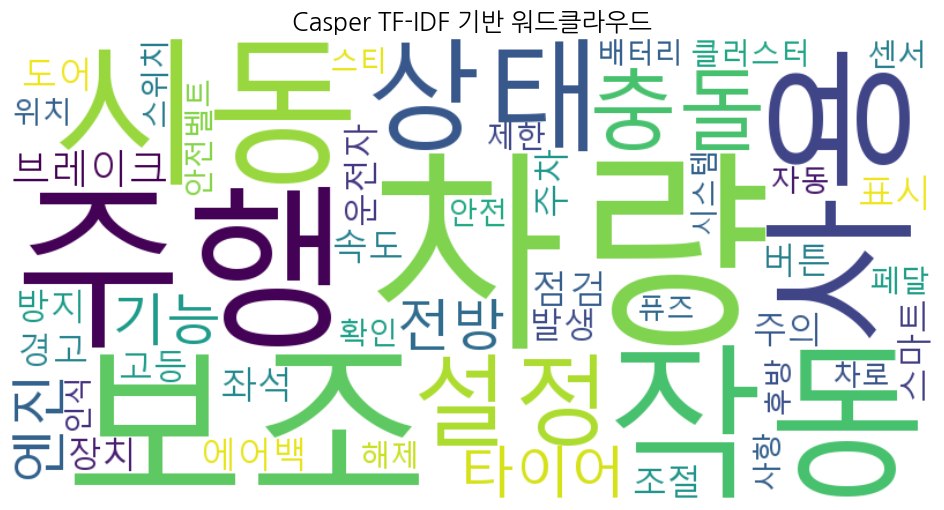

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
casper_docs = [' '.join(tokens) for tokens in casper_filtered_tokens]

# 2. TF-IDF 벡터화
casper_vectorizer = TfidfVectorizer()
casper_X = casper_vectorizer.fit_transform(casper_docs)

# 3. 단어와 점수 추출
casper_words = casper_vectorizer.get_feature_names_out()
casper_scores = casper_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
casper_word_scores = dict(zip(casper_words, casper_scores))

casper_top_50 = sorted(casper_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for casper_word, casper_score in casper_top_50:
    print(f"{casper_word}: {casper_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
casper_top_50_dict = dict(casper_top_50)

# 워드클라우드 생성
casper_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(casper_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(casper_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Casper TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

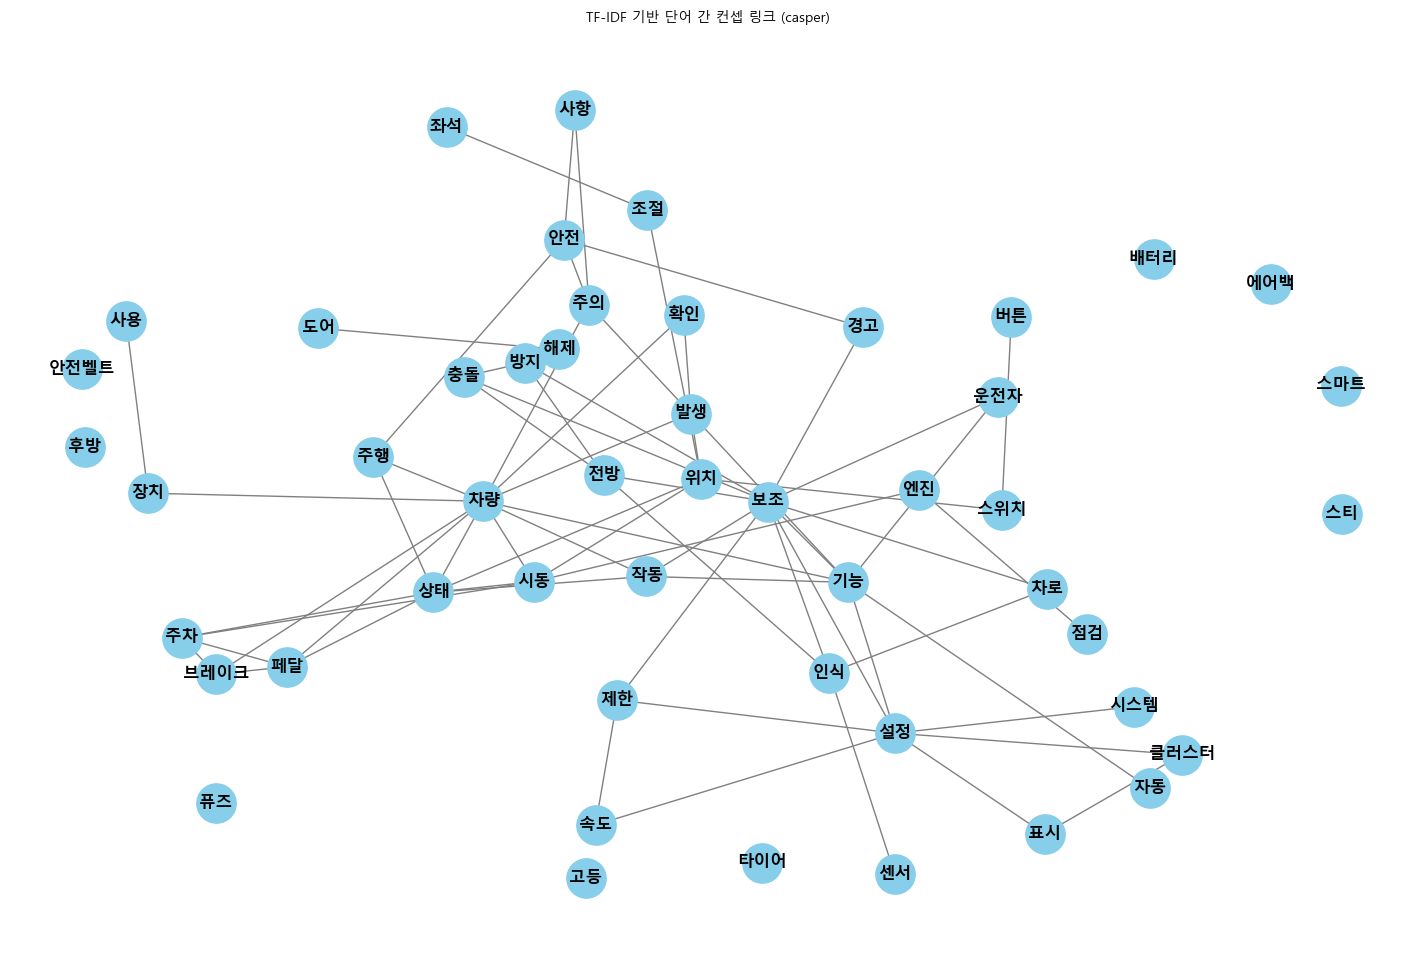

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. casper_top_50 단어 리스트와 인덱스 추출
casper_top_words = [word for word, score in casper_top_50]
casper_top_indices = [casper_vectorizer.vocabulary_[word] for word in casper_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
casper_word_vectors = casper_X[:, casper_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
casper_similarity_matrix = cosine_similarity(casper_word_vectors)

# 4. 네트워크 그래프 생성
casper_G = nx.Graph()

# 노드 추가
for word in casper_top_words:
    casper_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
casper_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(casper_top_words)):
    for j in range(i + 1, len(casper_top_words)):
        sim = casper_similarity_matrix[i][j]
        if sim >= casper_threshold:
            casper_G.add_edge(casper_top_words[i], casper_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
casper_pos = nx.spring_layout(casper_G, k=0.5, seed=42)
nx.draw_networkx_nodes(casper_G, casper_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    casper_G, casper_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(casper_G, casper_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (casper)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [10]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

casper['cut_off'] = casper['text'].apply(is_cut_off)
casper_cut = casper[casper['cut_off']]
print(casper_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [11]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = casper[casper['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


Empty DataFrame
Columns: [text]
Index: []


In [12]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
casper['perplexity'] = casper['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = casper.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 274/274 [06:00<00:00,  1.32s/it]

                                                  text  perplexity
237  Ğ\n배터리 내부에는 부식성이\n강한 황산이 들어 있습니\n다.\n• 황산이  신체...  284.113557
2    사양표시\n본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하고 있\n...  255.108007
13   목 차\n차 량 살 펴 보 기\n안 전 및 주 의 사 항\n시 트 및 안 전 장 치...  228.875009
112  5\n• 전방에 신호등, 반사 표지판, 발광 표지판 또\n는 도로 반사경이 있는 경...  141.056172
121  Å\nA, C, D\n냉방 시 권장 설정\n• 상단/하단(약풍)\n균형 있는 냉난방...  126.365387
252  9\n창문 내부 청소 방법\n창문 내부에 유분이나 왁스 성분이 묻어 서리가\n끼는 ...  115.103912
239  Ġ\n• 배터리  가까이에서  작업\n하거나  배터리를  충전할\n때  보안경을  ...  113.087010
146  6\n• 'D'(주행) 에서 'L'(제한) 위치로 변속시 클러\n스터 변속 위치 표...  109.845857
125  5\nWL_RefrigerantWarning\n• 냉매는 고압 상태의 가연성 물질입...  108.217549
178  후측방 충돌방지 보조 (BCA)\n일정 속도 이상으로 주행 중 후측방의 차량을 인식...  107.598655


In [6]:
a=[237,2,13,112,121,252,239,146,125,178]
for i in (a):
    print(casper.loc[i,'text'])
    print('='*50)


Ğ
배터리 내부에는 부식성이
강한 황산이 들어 있습니
다.
• 황산이  신체, 옷,  페인트
등에  접촉하면  위험합니
다.
• 전해액이  눈에  들어가면
15분 이상 깨끗한 흐르는
물로 닦아내고 즉시 치료
를 받으십시오.
• 전해액이 피부에 닿은 경
우 접촉부를 깨끗이 씻어
내고,  통증이나  화상이
느껴지는 경우 즉시 치료
를 받으십시오.
AX_ko_KR.book  Page 27
사양표시
본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하고 있
습니다.
고객님의 차량에 장착되지 않는 사양에 대한 설명이 포함될 수 있습니다.
AX_ko_KR.book  Page 2
목 차
차 량 살 펴 보 기
안 전 및 주 의 사 항
시 트 및 안 전 장 치
클 러 스 터
편 의 장 치
시 동 및 주 행
운 전 자 보 조
비 상 시 응 급 조 치
차 량 의 유 지 보 수
색 인
보 증 서 / 보 증 수 리 서
5
• 전방에 신호등, 반사 표지판, 발광 표지판 또
는 도로 반사경이 있는 경우
• 전방에 임시로 설치된 반사체나 발광체가 있
는 경우(공사 구간 등)
• 노면이 젖어 있거나 눈 또는 얼음으로 덮여
있는 등 도로 환경이 나쁜 경우
• 곡선 길 등에서 전방 차량이 갑자기 나타나
는 경우
• 타이어가 손상되어 차체가 기울어 있거나 차
량을 견인 중인 경우
(cid:2737)(cid:2628)
• 하이빔 보조 기능이 정상적으로 작동하지 않
는  경우  수동으로  상향등을  켜거나  끄십시
오.
• 하이빔 보조 성능을 최적의 상태로 유지하기
위해서는 전방 카메라를 적절하게 관리해야
합니다.
• 전방 카메라의 관리에 대한 자세한 설명은 '
제한 사항'에 수록된 안전 정보와 주의 사항 을 참고하십시오.
• 차량 시동 시 또는 전방 카메라 초기화 시 약
15초 동안 기능이 작동하지 않을 수 있습니
다.
5-41
AX_ko_KR.book  Page 42
편의 장치
Å
A, C, D
냉방 시 권장 설정
• 상단/하단(약풍)
균형 있는 냉난방 설정
• 상단/하단
난방 시 권

# 괜찮은거 같은데? 
(cid:2444)(cid:2439)(cid:1601)(cid:1245) 이런거 때문일 수도?

100점 이상일 경우 부자연스러운 문장으로 간주

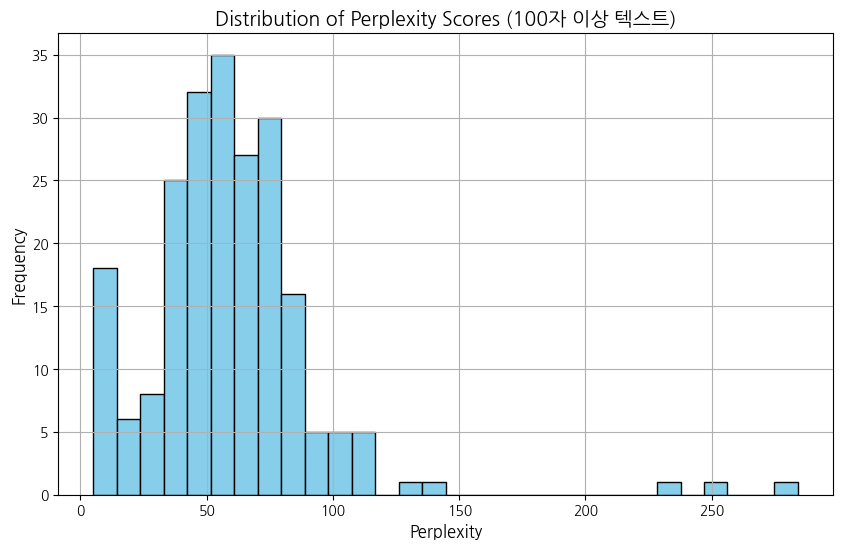

In [13]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = casper['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
